In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


C:\Users\anuku\AppData\Local\Temp\ipykernel_8992\432487659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='orange')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

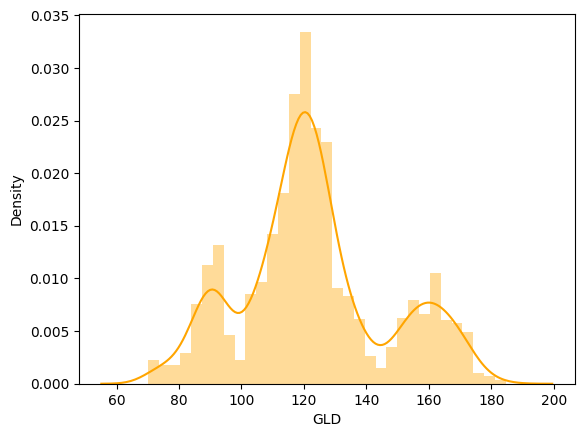

In [13]:
sns.distplot(df['GLD'],color='orange')

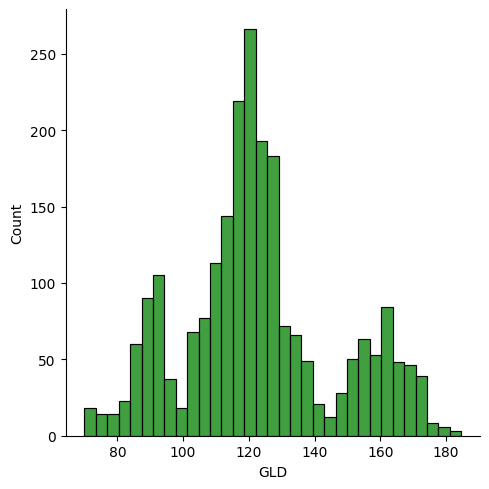

In [14]:
sns.displot(df['GLD'],color='green')

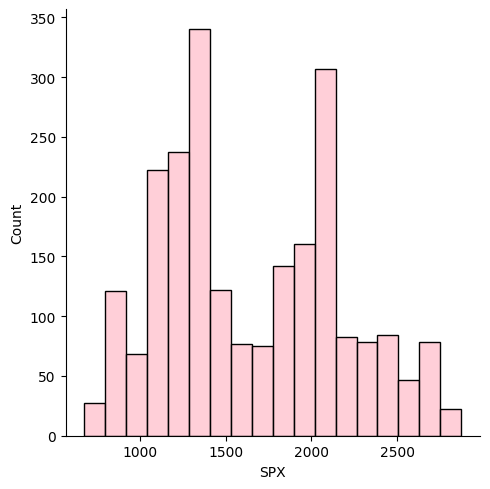

In [15]:
sns.displot(df['SPX'],color='pink')

C:\Users\anuku\AppData\Local\Temp\ipykernel_8992\64660309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues')


<AxesSubplot: >

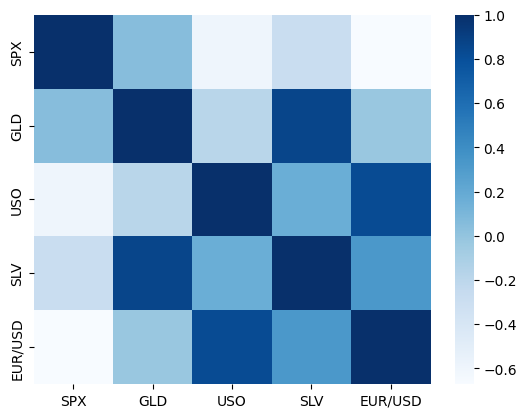

In [23]:
sns.heatmap(df.corr(),cmap='Blues')

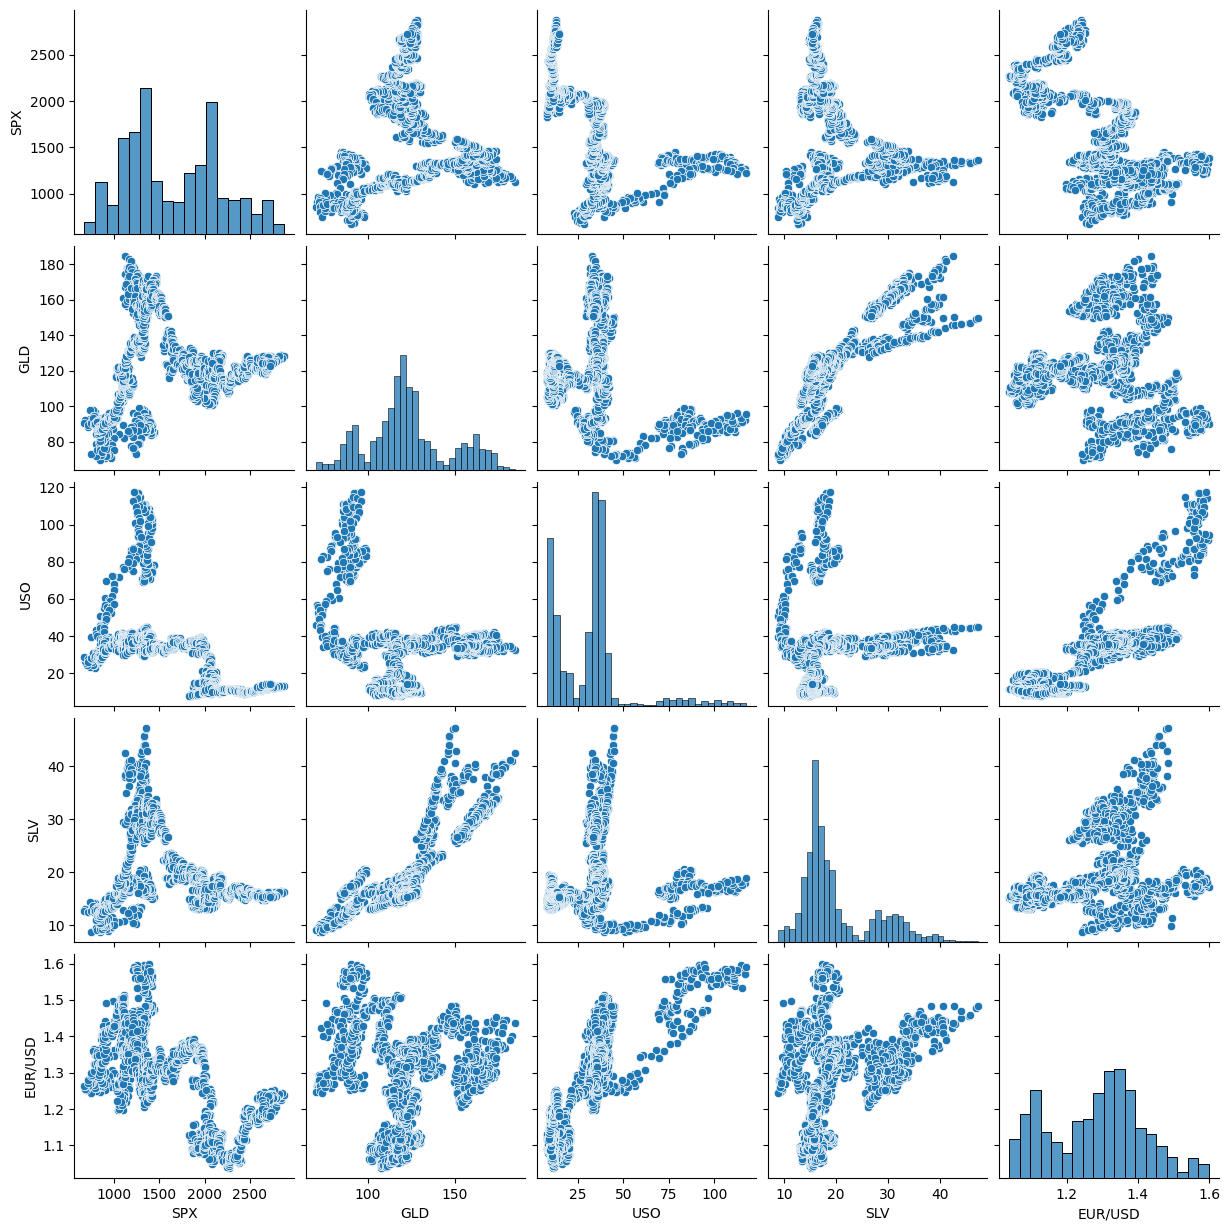

In [26]:
sns.pairplot(df)

In [27]:
df.columns.tolist()

['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

In [33]:
X=df[['SPX', 'USO', 'SLV', 'EUR/USD']].values
Y =df['GLD'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
X_train

array([[1.16581006e+03, 3.95600010e+01, 1.66000000e+01, 1.35670500e+00],
       [1.34998999e+03, 7.59300000e+01, 1.69520000e+01, 1.46761000e+00],
       [2.04189001e+03, 1.07400000e+01, 1.30800000e+01, 1.08745300e+00],
       ...,
       [1.28350000e+03, 3.60099980e+01, 3.43699990e+01, 1.42700200e+00],
       [1.21828003e+03, 3.52000010e+01, 3.23300020e+01, 1.38600100e+00],
       [2.07741992e+03, 1.91000000e+01, 1.49000000e+01, 1.10336300e+00]])

In [37]:
Y_test

array([128.789993, 115.620003, 139.220001, 120.93    ,  93.040001,
       154.649994, 116.720001, 113.029999, 149.740005, 104.800003,
       103.709999, 119.660004,  91.18    , 159.669998, 121.629997,
       116.43    ,  88.949997,  91.610001,  93.269997, 127.849998,
        79.199997, 118.470001, 126.339996, 175.779999, 174.580002,
       138.539993, 114.099998, 160.460007, 134.830002, 113.830002,
       110.470001, 105.489998, 128.679993, 122.760002,  97.699997,
       122.290001,  85.07    , 115.470001, 128.380005, 139.259995,
       103.919998, 127.93    , 108.32    , 134.369995, 134.179993,
       147.630005, 119.82    , 159.460007, 157.699997, 127.599998,
       123.32    , 114.870003, 124.169998, 120.559998, 154.210007,
       122.709999, 111.970001,  85.550003, 156.490005, 118.809998,
        86.699997, 114.419998,  82.199997, 146.740005, 125.410004,
       124.269997, 124.599998, 120.989998, 167.509995, 121.650002,
       125.389999, 173.309998, 121.690002, 166.339996, 116.629

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rfc = RandomForestRegressor(n_estimators=100)

In [47]:
rfc.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
pred = rfc.predict(X_test)

In [50]:
pred

array([126.96469897, 116.9464995 , 139.5745005 , 122.35050067,
        94.18240015, 155.2639008 , 117.56200103, 113.24010122,
       153.30880056, 105.52710066, 103.15109912, 120.15470089,
        92.28829916, 158.90190127, 121.47709841, 117.52210084,
        86.85949832,  91.99279897,  93.29259971, 125.71139969,
        82.77749943, 117.30189857, 126.24569829, 172.47109721,
       169.83779769, 139.71880269, 114.34389954, 159.94140343,
       133.58680012, 115.29140016, 110.98500091, 104.852902  ,
       128.07210068, 122.16149978,  99.08869956, 120.11349966,
        84.04330028, 114.96160012, 127.38549867, 140.31289855,
       108.0250008 , 131.68220103, 108.17189953, 134.58160078,
       133.68909933, 148.66889925, 119.61970055, 158.06310045,
       156.788802  , 127.654     , 123.85909973, 115.46209814,
       124.24810053, 119.20229945, 153.74100003, 121.45319982,
       112.3241005 ,  86.77449954, 155.6064006 , 117.48680117,
        88.12889949, 114.65339985,  83.35519925, 146.61

In [51]:
from sklearn.metrics import r2_score

In [52]:
print(r2_score(Y_test,pred))

0.9898497441243954


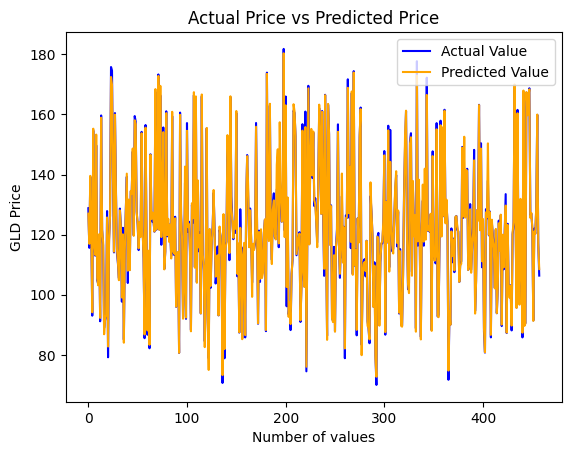

In [54]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(pred, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [67]:
dff = pd.DataFrame(Y_test,columns=['Y_test'])

In [68]:
dff['Prediction'] = pred

In [69]:
dff

,Y_test,Prediction
0,128.789993,126.964699
1,115.620003,116.946499
2,139.220001,139.574501
3,120.930000,122.350501
4,93.040001,94.182400
...,...,...
453,120.360001,120.265101
454,129.130005,129.229998
455,159.869995,159.956700
456,117.339996,116.868200


In [70]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()


In [72]:
dff[['Y_test','Prediction']].iplot()

In [76]:
dff.iplot(kind='hist')

In [78]:
dff.iplot(kind='box')